In [3]:
base = '/Users/pratheeksha/School/SEA-Project'
import sys
import os
sys.path.insert(0, base + 'util')
from image_processing_fns import *
import numpy as np

In [4]:
im_path = base + '/data/test/images'
matrix_path = base + '/data/test/images_numpy'
MAX_ARRAY_SIZE = 100

In [12]:
from __future__ import absolute_import
from __future__ import print_function

import pickle

import numpy
from six.moves import range
from spatialtree import spatialtree

all_feats = pickle.load(open("/Users/pratheeksha/School/SEA-Project/data/test/features/feat_dict.p", "rb"))
count = -1

N = 5000
D = 4096
X = dict()

In [63]:
P = numpy.random.randn(D, D)
def newpoint(p):
    return numpy.dot(p, P)
for k in all_feats:
    X[str(k)] = newpoint(all_feats[k])

In [64]:
print('Building tree...')
T = spatialtree(X, rule='2-means', spill=0.3)
print('done.')

Building tree...
done.


In [65]:
print(('# items in tree    : ', len(T)))
print(('Dimensionality     : ', T.getDimension()))
print(('Height of tree     : ', T.getHeight()))
print(('Spill percentage   : ', T.getSpill()))
print(('Split rule         : ', T.getRule()))

('# items in tree    : ', 569)
('Dimensionality     : ', 4096)
('Height of tree     : ', 1)
('Spill percentage   : ', 0.3)
('Split rule         : ', '2-means')


In [81]:
knn_1 = T.k_nearest(X, k=10, index='1')
print(('KNN(1)           : ', knn_1))


knn_72 = T.k_nearest(X, k=10, index='72')
print(('KNN(72)           : ', knn_72))


knn_13 = T.k_nearest(X, k=10, index='13')
print(('KNN(13)           : ', knn_13))

knn_503 = T.k_nearest(X, k=10, index='503')
print(('KNN(503)           : ', knn_503))


('KNN(1)           : ', ['462', '72', '13', '386', '508', '62', '2', '390', '68', '9'])
('KNN(72)           : ', ['508', '146', '68', '337', '33', '299', '144', '454', '386', '276'])
('KNN(13)           : ', ['508', '72', '162', '146', '386', '2', '452', '276', '337', '113'])
('KNN(503)           : ', ['266', '216', '508', '285', '548', '460', '244', '177', '504', '219'])


In [82]:
array_dict = dict()
for m in os.listdir(matrix_path):
    array = np.load(os.path.join(matrix_path, m))
    array_num = int(m[:-4])
    
    if array_num in array_dict:
        array_dict[array_num].extend(array)
    else:
        array_dict[array_num] = array
    print("Loaded array {}, array num: {}".format(m, array_num))
for k in array_dict:
    print (len(array_dict[k]))

Loaded array 0.npy, array num: 0
Loaded array 1.npy, array num: 1
Loaded array 2.npy, array num: 2
Loaded array 3.npy, array num: 3
Loaded array 4.npy, array num: 4
Loaded array 5.npy, array num: 5
100
100
100
100
100
69


In [84]:
def test_ims(arraydict, max_array_size, idxs):
    
    for i in idxs:
        i = int(i)
        array_num = round(i/ 100)
        im_indx = i % 100
        im = arraydict[array_num][im_indx]
#         fname = str(i) + ".jpg"
        fname = str(array_num * max_array_size + im_indx + 1) + ".jpg"
        print("Matrix num: {} idx: {}: image file: {}".format(
            array_num, im_indx, fname))
#         print("Original image")
#         showImage(fname, im_path)
        print("near neighbor image")
        displayImageInline(im)
    print()
    print()


def print_og(idx):
    print("original image")
    test_ims(array_dict, MAX_ARRAY_SIZE, [str(idx)])


original image
Matrix num: 0 idx: 1: image file: 2.jpg
near neighbor image


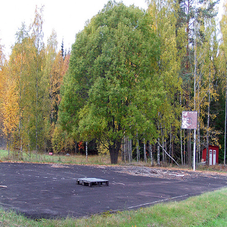



Matrix num: 5 idx: 62: image file: 563.jpg
near neighbor image


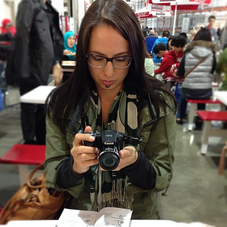

Matrix num: 1 idx: 72: image file: 173.jpg
near neighbor image


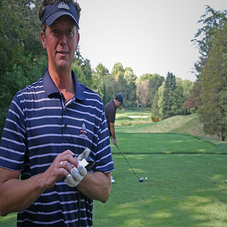

Matrix num: 0 idx: 13: image file: 14.jpg
near neighbor image


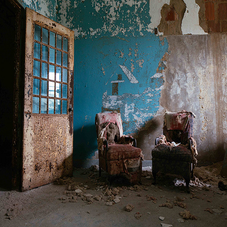

Matrix num: 4 idx: 86: image file: 487.jpg
near neighbor image


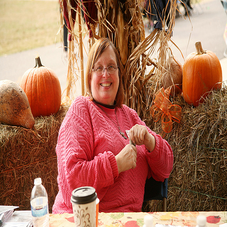

Matrix num: 5 idx: 8: image file: 509.jpg
near neighbor image


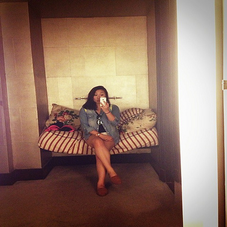

Matrix num: 1 idx: 62: image file: 163.jpg
near neighbor image


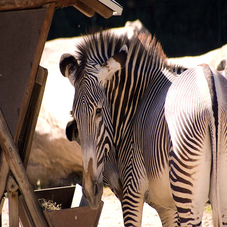

Matrix num: 0 idx: 2: image file: 3.jpg
near neighbor image


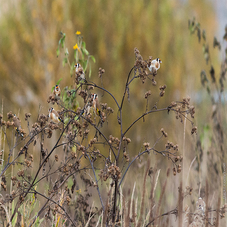

Matrix num: 4 idx: 90: image file: 491.jpg
near neighbor image


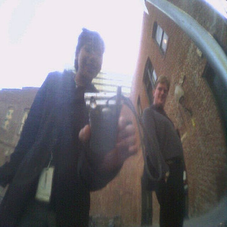

Matrix num: 1 idx: 68: image file: 169.jpg
near neighbor image


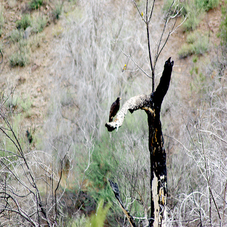

Matrix num: 0 idx: 9: image file: 10.jpg
near neighbor image


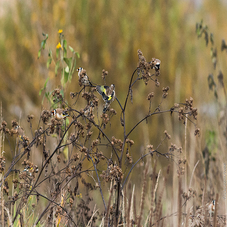



original image
Matrix num: 1 idx: 72: image file: 173.jpg
near neighbor image


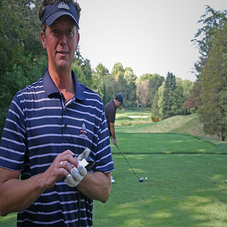



Matrix num: 5 idx: 8: image file: 509.jpg
near neighbor image


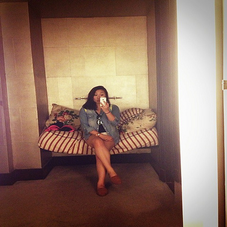

Matrix num: 1 idx: 46: image file: 147.jpg
near neighbor image


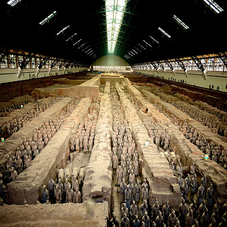

Matrix num: 1 idx: 68: image file: 169.jpg
near neighbor image


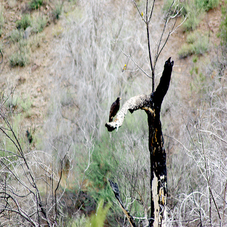

Matrix num: 3 idx: 37: image file: 338.jpg
near neighbor image


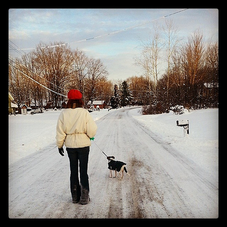

Matrix num: 0 idx: 33: image file: 34.jpg
near neighbor image


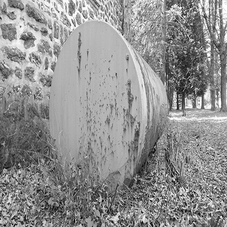

Matrix num: 3 idx: 99: image file: 400.jpg
near neighbor image


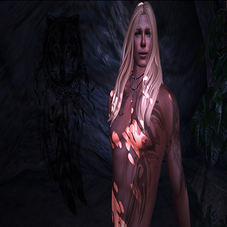

Matrix num: 1 idx: 44: image file: 145.jpg
near neighbor image


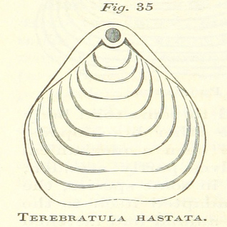

Matrix num: 5 idx: 54: image file: 555.jpg
near neighbor image


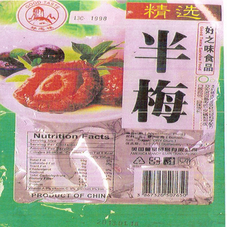

Matrix num: 4 idx: 86: image file: 487.jpg
near neighbor image


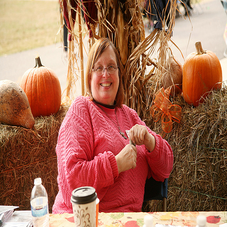

Matrix num: 3 idx: 76: image file: 377.jpg
near neighbor image


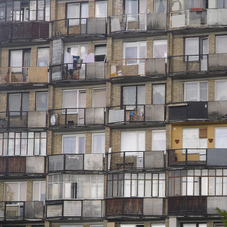



original image
Matrix num: 0 idx: 13: image file: 14.jpg
near neighbor image


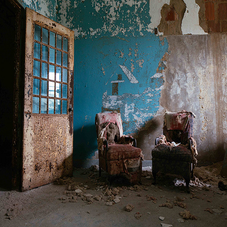



Matrix num: 5 idx: 8: image file: 509.jpg
near neighbor image


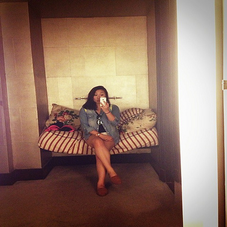

Matrix num: 1 idx: 72: image file: 173.jpg
near neighbor image


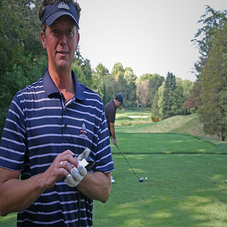

Matrix num: 2 idx: 62: image file: 263.jpg
near neighbor image


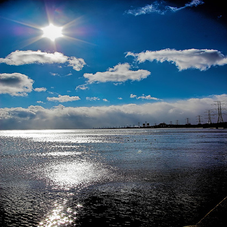

Matrix num: 1 idx: 46: image file: 147.jpg
near neighbor image


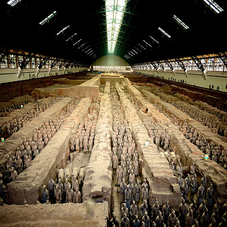

Matrix num: 4 idx: 86: image file: 487.jpg
near neighbor image


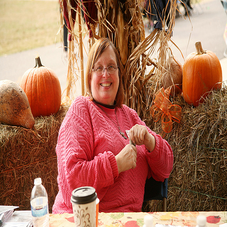

Matrix num: 0 idx: 2: image file: 3.jpg
near neighbor image


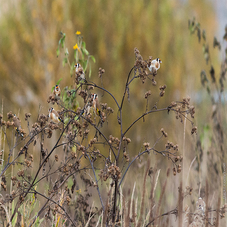

Matrix num: 5 idx: 52: image file: 553.jpg
near neighbor image


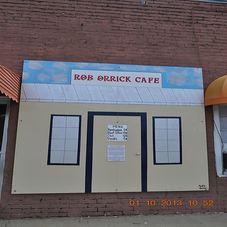

Matrix num: 3 idx: 76: image file: 377.jpg
near neighbor image


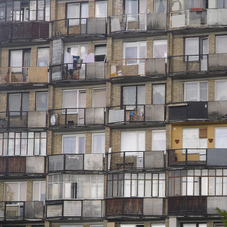

Matrix num: 3 idx: 37: image file: 338.jpg
near neighbor image


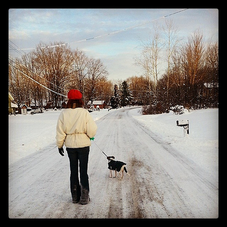

Matrix num: 1 idx: 13: image file: 114.jpg
near neighbor image


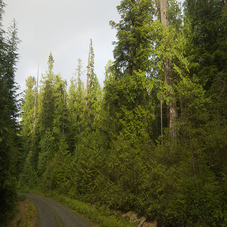



original image
Matrix num: 5 idx: 3: image file: 504.jpg
near neighbor image


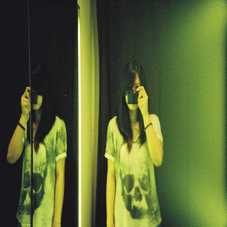



Matrix num: 3 idx: 66: image file: 367.jpg
near neighbor image


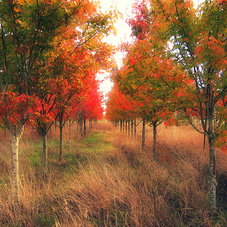

Matrix num: 2 idx: 16: image file: 217.jpg
near neighbor image


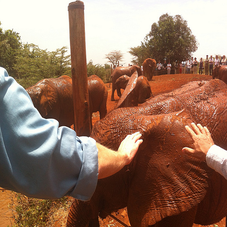

Matrix num: 5 idx: 8: image file: 509.jpg
near neighbor image


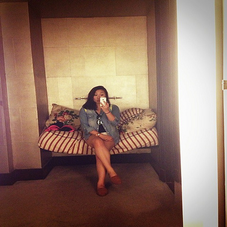

Matrix num: 3 idx: 85: image file: 386.jpg
near neighbor image


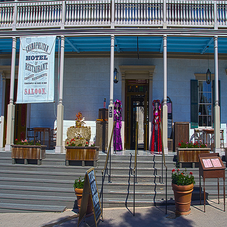

Matrix num: 5 idx: 48: image file: 549.jpg
near neighbor image


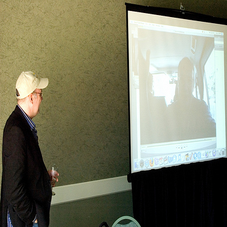

Matrix num: 5 idx: 60: image file: 561.jpg
near neighbor image


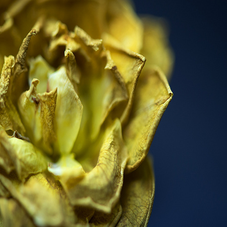

Matrix num: 2 idx: 44: image file: 245.jpg
near neighbor image


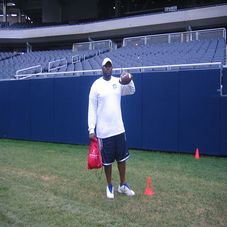

Matrix num: 2 idx: 77: image file: 278.jpg
near neighbor image


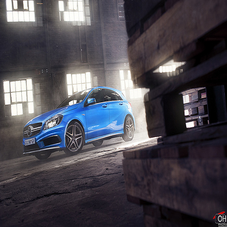

Matrix num: 5 idx: 4: image file: 505.jpg
near neighbor image


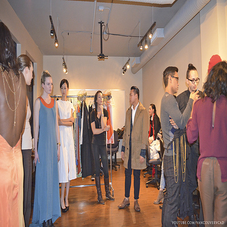

Matrix num: 2 idx: 19: image file: 220.jpg
near neighbor image


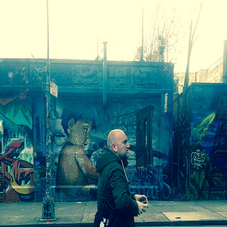

In [85]:
print_og(1)
test_ims(array_dict, MAX_ARRAY_SIZE, knn_1)
print_og(72)

test_ims(array_dict, MAX_ARRAY_SIZE, knn_72)
print_og(13)

test_ims(array_dict, MAX_ARRAY_SIZE, knn_13)
print_og(503)

test_ims(array_dict, MAX_ARRAY_SIZE, knn_503)

original image
Matrix num: 1 idx: 72: image file: 173.jpg
Resized image


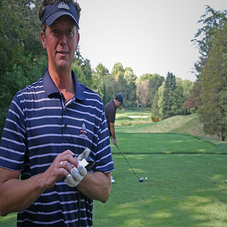